<a href="https://colab.research.google.com/github/vpxop111/scamrASKSHAK/blob/master/testmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check for unexpected values in v1 (labels)
print("\nUnique values in 'v1' (label):")
print(df['v1'].unique())


Missing values in each column:
v2    1
v1    0
dtype: int64

Number of duplicate rows: 417

Unique values in 'v1' (label):
['ham' 'scam']


In [11]:
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
v2    object
v1    object
dtype: object


In [12]:
# Check if v1 contains only 'ham' and 'scam'
valid_labels = ['ham', 'scam']
invalid_labels = df[~df['v1'].isin(valid_labels)]
if len(invalid_labels) > 0:
    print("\nInvalid labels found:")
    print(invalid_labels)
else:
    print("\nNo invalid labels found in 'v1'.")



No invalid labels found in 'v1'.



Distribution of 'v1' (ham vs. scam):
ham     4571
scam    4368
Name: v1, dtype: int64


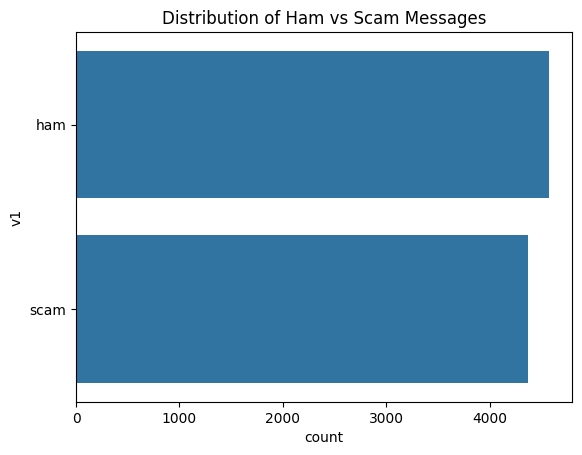

In [13]:
# Check the balance between ham and scam messages
print("\nDistribution of 'v1' (ham vs. scam):")
print(df['v1'].value_counts())

# Visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['v1'])
plt.title('Distribution of Ham vs Scam Messages')
plt.show()



Message length statistics:
count    8939.000000
mean       71.867770
std        28.815257
min         2.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       329.000000
Name: message_length, dtype: float64


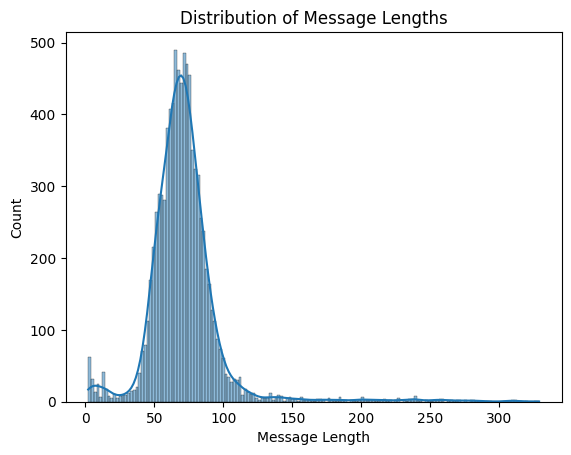

In [15]:
# Add a column for message length
df['message_length'] = df['v2'].astype(str).apply(len) # Changed to handle potential float values by converting to string first.

# Check message length statistics
print("\nMessage length statistics:")
print(df['message_length'].describe())

# Plot distribution of message lengths
sns.histplot(df['message_length'], kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.show()

In [16]:
scam_keywords = ['prize', 'offer', 'urgent', 'win', 'claim', 'congratulations']
scam_messages = df[df['v1'] == 'scam']

for keyword in scam_keywords:
    print(f"\nMessages containing '{keyword}':")
    print(scam_messages[scam_messages['v2'].str.contains(keyword, case=False, na=False)].sample(5))



Messages containing 'prize':
                                                     v2    v1  message_length
3553  . Claims of winning a contest or prize linked ...  scam              71
790   • “Great news! You’ve been selected as a winne...  scam              96
3347  • . Congratulations! You’re a winner. Complete...  scam              79
3753  . Urgent message: Claim your $550,000 lottery ...  scam              74
3987  . Claim your $750,000 prize! Pay a small fee o...  scam              78

Messages containing 'offer':
                                                     v2    v1  message_length
1751  • Work overseas with our guaranteed job offer ...  scam              72
6676  . Special offer alert! Affordable holiday pack...  scam              64
5751  . Act now to save on health insurance premiums...  scam              67
2137  • “Exclusive dating offers just for you: [phis...  scam              57
5753  . Urgent offer: Get health insurance at a redu...  scam              71

Mes

In [17]:
# Randomly sample 10 scam and 10 ham messages for manual inspection
print("\nSample of scam messages:")
print(df[df['v1'] == 'scam'].sample(10))

print("\nSample of ham messages:")
print(df[df['v1'] == 'ham'].sample(10))



Sample of scam messages:
                                                     v2    v1  message_length
8270  . इनसाइडर डील! मुंबई में पंद्रह लाख में विशेष ...  scam              50
7774  • अपने पैकेज को अपग्रेड करें और मुफ्त डेटा पाए...  scam              63
8451  तीन. "मेरे परिवार में एक आपातकालीन स्थिति है औ...  scam             110
6083  . Support our charity to empower women across ...  scam              72
5300  . Claim your scholarship from the Worldwide Le...  scam              72
6561  . Urgent tech support required: Payment is nec...  scam              72
3825  . Act fast! Claim your exclusive entry into ou...  scam              71
1107  • Shipping notification: Click here to update ...  scam              83
7370  "मैंने इस योजना में निवेश किया और सिर्फ 3 महीन...  scam              97
2630  • Verify your account for exclusive benefits. ...  scam              61

Sample of ham messages:
                                                     v2   v1  message_length
7020  • Notice

In [18]:
# Set thresholds for message length outliers (based on your domain knowledge)
min_length = 10
max_length = 500

outliers = df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]
print(f"\nNumber of outlier messages (too short or too long): {len(outliers)}")
if len(outliers) > 0:
    print("\nSample of outlier messages:")
    print(outliers[['v1', 'v2', 'message_length']].sample(5))



Number of outlier messages (too short or too long): 120

Sample of outlier messages:
       v1      v2  message_length
477   ham      Hi               2
698   ham     Hi,               3
382  scam     Hi,               3
224  scam     Hi,               3
284  scam  Hello,               6


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert text to features using CountVectorizer
vectorizer = CountVectorizer()

# Fill NaN values with empty strings
df['v2'] = df['v2'].fillna('')

X = vectorizer.fit_transform(df['v2'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Check model performance
print("\nClassification report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification report:
              precision    recall  f1-score   support

         ham       0.84      0.83      0.83       915
        scam       0.82      0.83      0.83       873

    accuracy                           0.83      1788
   macro avg       0.83      0.83      0.83      1788
weighted avg       0.83      0.83      0.83      1788



Missing values in each column:
v2    1
v1    0
dtype: int64

Number of duplicate rows: 417

Unique values in 'v1' (label):
['ham' 'scam']

Data types of each column:
v2    object
v1    object
dtype: object

No invalid labels found in 'v1'.

Distribution of 'v1' (ham vs. scam):
ham     4571
scam    4368
Name: v1, dtype: int64


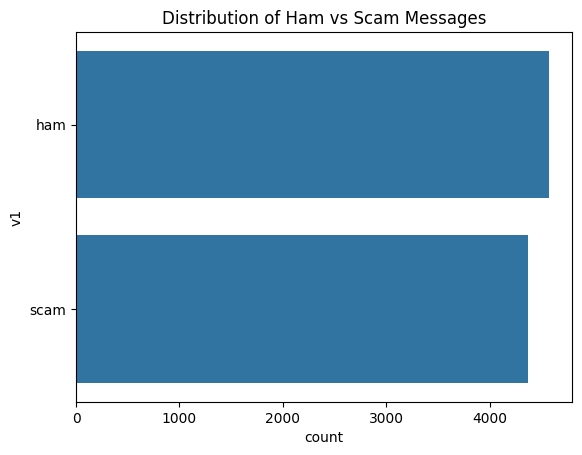


Message length statistics:
count    8939.000000
mean       71.867770
std        28.815257
min         2.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       329.000000
Name: message_length, dtype: float64


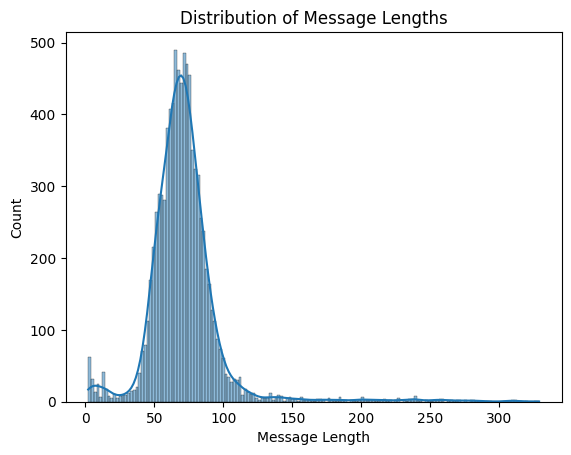


Messages containing 'prize':
                                                     v2    v1  message_length
2357  . Your UPI ID has won ₹8,000 in our lucky draw...  scam              71
3823  . Claim your $700,000 lottery prize! Pay $200 ...  scam              71
3957  . You're the lucky winner of $500,000 in our c...  scam              85
427   Hey! Would you like to win cash prizes? Get th...  scam             201
3767  . Your lottery winnings are waiting! Pay $250 ...  scam              83

Messages containing 'offer':
                                                     v2    v1  message_length
5511  . Special offer on flight tickets. Click here ...  scam              60
880   • “Act fast! Limited time offer to invest in o...  scam              68
3776  . Special offer for lottery winners: Pay $300 ...  scam              76
1749  • Start your international career with our job...  scam              76
4914  . Special offer: Avail loans at 4% interest ra...  scam              60

Mes

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification report:
              precision    recall  f1-score   support

         ham       0.84      0.83      0.83       915
        scam       0.82      0.83      0.83       873

    accuracy                           0.83      1788
   macro avg       0.83      0.83      0.83      1788
weighted avg       0.83      0.83      0.83      1788


Random sample of 5 messages for manual inspection:
                                                     v2    v1  message_length
2785  Hi! I came across your profile and thought we ...  scam              61
8602      14. . मेरे स्कूल के एलुमनी मीट में शामिल हों।   ham              45
5293  . Exclusive scholarship offer from the Interna...  scam              87
7622  • आसान रिफंड प्रक्रिया, अभी मुफ्त में क्लिक कर...  scam              64
2853  Unlock the latest social media trends and tips...  scam              75


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# 1. Basic Data Validation
print("Missing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nUnique values in 'v1' (label):")
print(df['v1'].unique())

# 2. Data Consistency
print("\nData types of each column:")
print(df.dtypes)

# Check if 'v1' contains only 'ham' and 'scam'
valid_labels = ['ham', 'scam']
invalid_labels = df[~df['v1'].isin(valid_labels)]
if len(invalid_labels) > 0:
    print("\nInvalid labels found:")
    print(invalid_labels)
else:
    print("\nNo invalid labels found in 'v1'.")

# 3. Data Distribution
print("\nDistribution of 'v1' (ham vs. scam):")
print(df['v1'].value_counts())

# Visualize distribution of 'ham' vs. 'scam'
sns.countplot(df['v1'])
plt.title('Distribution of Ham vs Scam Messages')
plt.show()

# 4. Message Content Quality
# Add a column for message length
df['message_length'] = df['v2'].astype(str).apply(len) # Convert the column to string type before applying len()

# Check message length statistics
print("\nMessage length statistics:")
print(df['message_length'].describe())

# Plot distribution of message lengths
sns.histplot(df['message_length'], kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.show()

# Keyword analysis for scam messages
scam_keywords = ['prize', 'offer', 'urgent', 'win', 'claim', 'congratulations']
scam_messages = df[df['v1'] == 'scam']

for keyword in scam_keywords:
    print(f"\nMessages containing '{keyword}':")
    print(scam_messages[scam_messages['v2'].str.contains(keyword, case=False, na=False)].sample(5))

# 5. Check Label Accuracy (manual inspection)
print("\nSample of scam messages:")
print(df[df['v1'] == 'scam'].sample(10))

print("\nSample of ham messages:")
print(df[df['v1'] == 'ham'].sample(10))

# 6. Outlier Detection
# Set thresholds for message length outliers
min_length = 10
max_length = 500

outliers = df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]
print(f"\nNumber of outlier messages (too short or too long): {len(outliers)}")
if len(outliers) > 0:
    print("\nSample of outlier messages:")
    print(outliers[['v1', 'v2', 'message_length']].sample(5))

# 7. Cross-Validation (Model Testing)
# Convert text to features using CountVectorizer
vectorizer = CountVectorizer()

# Fill NaN values with empty strings before applying fit_transform
df['v2'] = df['v2'].fillna('')

X = vectorizer.fit_transform(df['v2'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Check model performance
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# 8. Manual Inspection of Random Samples
print("\nRandom sample of 5 messages for manual inspection:")
print(df.sample(5))


In [ ]:
# 7. Cross-Validation (Model Testing)
# Convert text to features using CountVectorizer
vectorizer = CountVectorizer()

# Fill NaN values with empty strings before applying fit_transform
df['v2'] = df['v2'].fillna('')

X = vectorizer.fit_transform(df['v2'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Check model performance
print("\nClassification report:")
print(classification_report(y_test, y_pred))

In [26]:
# prompt: fetch row counts in dataset

row_count = df.shape[0]
print(f"The dataset has {row_count} rows.")


The dataset has 8939 rows.


In [ ]:
#level 1 testing

Missing values in each column:
v2    1
v1    0
dtype: int64

Number of duplicate rows: 417

Unique values in 'v1' (label):
['ham' 'scam']

Number of outlier messages (too short or too long): 120

Sample of outlier messages:
       v1         v2  message_length
665   ham        Hi,               3
263  scam    Hi Sir,               7
451   ham  Hi xxxxx,               9
695   ham        Hi,               3
259  scam      Hi 👋🏻               5
..    ...        ...             ...
318  scam       Hey,               4
264  scam        Hi,               3
547   ham   Namaste,               8
47    ham        Hi,               3
630   ham   Jai Hind               8

[120 rows x 3 columns]

Number of short messages (less than 10 characters): 120


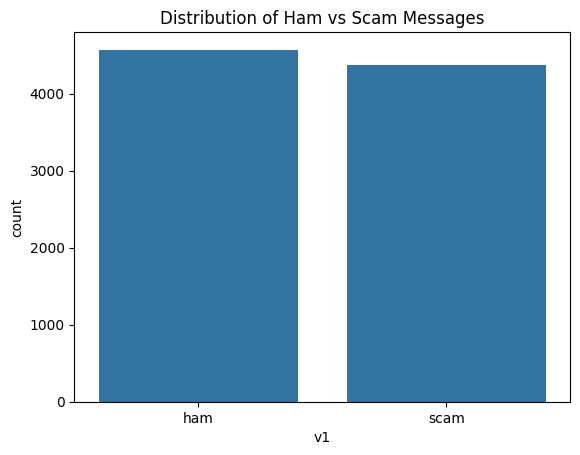

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Check for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check Unique Labels
print("\nUnique values in 'v1' (label):")
print(df['v1'].unique())

min_length = 10
max_length = 500

# Add a column for message length
df['message_length'] = df['v2'].astype(str).apply(len)

# Message Length Analysis
outliers = df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]
print(f"\nNumber of outlier messages (too short or too long): {len(outliers)}")
if len(outliers) > 0:
    print("\nSample of outlier messages:")
    # Use len(outliers) to ensure the sample size does not exceed the number of outliers
    print(outliers[['v1', 'v2', 'message_length']].sample(len(outliers)))

# Count of short messages
short_messages_count = df[df['message_length'] < min_length].shape[0]
print(f"\nNumber of short messages (less than {min_length} characters): {short_messages_count}")

# Visualize Basic Data Distribution
sns.countplot(x='v1', data=df)
plt.title('Distribution of Ham vs Scam Messages')
plt.show()

In [ ]:
#level 1 promblems
# Missing Values: 1
# Duplicate Rows: 417 duplicate rows
# Outlier Messages : 120 outlier messages
# Short Messages : 120 messages

In [36]:
#level 1 solution

# Option 1: Fill missing value
df['v2'].fillna("unknown", inplace=True)

# Option 2: Remove row with missing value
# df.dropna(subset=['v2'], inplace=True)

df.drop_duplicates(inplace=True)

df = df[~df['v2'].isin(outliers['v2'])]


Missing values in each column before cleaning:
v2    1
v1    0
dtype: int64

Missing values in each column after filling:
v2    0
v1    0
dtype: int64

Number of duplicate rows before cleaning: 417
Number of duplicate rows after cleaning: 0

Number of outlier messages (too short or too long) before cleaning: 39
Number of outlier messages (too short or too long) after cleaning: 0
Remaining rows in dataset after outlier removal: 8483


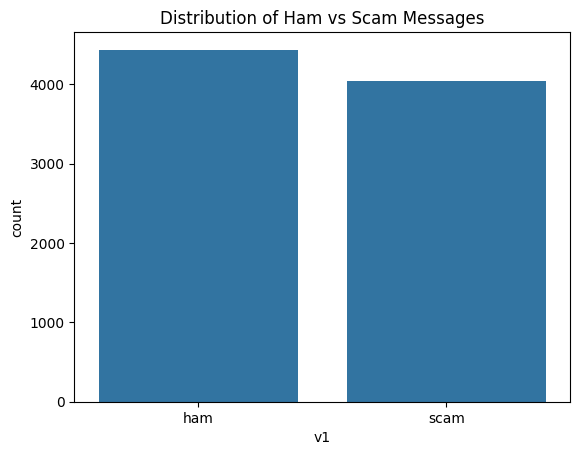

In [40]:
#checking of the level 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Check for Missing Values
print("Missing values in each column before cleaning:")
print(df.isnull().sum())

# Fill missing value
df['v2'].fillna("unknown", inplace=True)
print("\nMissing values in each column after filling:")
print(df.isnull().sum())

# Check for Duplicates
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

# Add a column for message length
df['message_length'] = df['v2'].astype(str).apply(len)

# Identify outliers
min_length = 10
max_length = 500
outliers = df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]
print("\nNumber of outlier messages (too short or too long) before cleaning:", len(outliers))

# Remove outlier messages
df = df[~df['message_length'].isin(outliers['message_length'])]
print("Number of outlier messages (too short or too long) after cleaning:", len(df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]))
print("Remaining rows in dataset after outlier removal:", df.shape[0])

# Visualize Basic Data Distribution
sns.countplot(x='v1', data=df)
plt.title('Distribution of Ham vs Scam Messages')
plt.show()


Missing values in each column before cleaning:
v2    1
v1    0
dtype: int64

Missing values in each column after filling:
v2    0
v1    0
dtype: int64

Number of duplicate rows before cleaning: 417
Number of duplicate rows after cleaning: 0

Number of outlier messages (too short or too long) before cleaning: 39
Number of outlier messages (too short or too long) after cleaning: 0
Remaining rows in dataset after outlier removal: 8483
Cleaned dataset saved as: /content/drive/MyDrive/level1scam4.csv


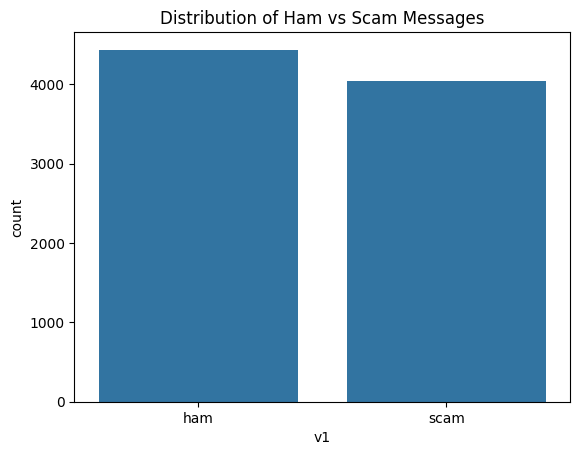

In [41]:
# updated level1 dataset level1scam4.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Check for Missing Values
print("Missing values in each column before cleaning:")
print(df.isnull().sum())

# Fill missing value
df['v2'].fillna("unknown", inplace=True)
print("\nMissing values in each column after filling:")
print(df.isnull().sum())

# Check for Duplicates
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

# Add a column for message length
df['message_length'] = df['v2'].astype(str).apply(len)

# Identify outliers
min_length = 10
max_length = 500
outliers = df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]
print("\nNumber of outlier messages (too short or too long) before cleaning:", len(outliers))

# Remove outlier messages
df = df[~df['message_length'].isin(outliers['message_length'])]
print("Number of outlier messages (too short or too long) after cleaning:", len(df[(df['message_length'] < min_length) | (df['message_length'] > max_length)]))
print("Remaining rows in dataset after outlier removal:", df.shape[0])

# Save the cleaned DataFrame to a new CSV file
output_file_path = '/content/drive/MyDrive/level1scam4.csv'
df.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved as: {output_file_path}")

# Visualize Basic Data Distribution
sns.countplot(x='v1', data=df)
plt.title('Distribution of Ham vs Scam Messages')
plt.show()


In [45]:
#issue finding level2

import pandas as pd
import re

# Load your cleaned dataset from Level 1
df = pd.read_csv('/content/drive/MyDrive/level1scam4.csv', encoding='utf-8')

# 1. Check for consistency in labels
print("\nUnique values in 'v1' (label):")
print(df['v1'].unique())

# Normalize labels (optional: you can enforce lowercase for consistency)
df['v1'] = df['v1'].str.lower().str.strip()

# 2. Text Preprocessing: Remove special characters and normalize case
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text.lower()

df['v2'] = df['v2'].apply(clean_text)

# 3. Analyze message length distribution
df['message_length'] = df['v2'].astype(str).apply(len)

# Check message length statistics
print("\nMessage length statistics:")
print(df['message_length'].describe())

# 4. Explore class imbalance
class_counts = df['v1'].value_counts()
print("\nClass distribution:")
print(class_counts)

# 5. (Optional) Explore languages if applicable
# You can analyze languages if you have language data in the messages.

# Save the updated dataset



Unique values in 'v1' (label):
['ham' 'scam']

Message length statistics:
count    8483.000000
mean       58.078156
std        34.600109
min         0.000000
25%        44.000000
50%        62.000000
75%        73.000000
max       323.000000
Name: message_length, dtype: float64

Class distribution:
ham     4438
scam    4045
Name: v1, dtype: int64
Updated dataset saved as: /content/drive/MyDrive/level2scam4.csv


In [49]:
#solving that issues in level2  Class Distribution , Minimum Message Length of 0

import pandas as pd
from sklearn.utils import resample

# Load your dataset again
df = pd.read_csv('/content/drive/MyDrive/level1scam4.csv', encoding='utf-8')

# 1. Remove empty messages
df = df[df['message_length'] > 0]

# 2. Save the updated dataset
df.to_csv('/content/drive/MyDrive/level2scam4_cleaned.csv', index=False)
print("Updated dataset saved as: /content/drive/MyDrive/level2scam4_cleaned.csv")

# 3. Check for empty messages again
empty_messages_count = df[df['message_length'] == 0].shape[0]
print(f"Number of empty messages after cleaning: {empty_messages_count}")

# 4. Display updated message length statistics
print("\nUpdated message length statistics:")
print(df['message_length'].describe())

# 5. Check class distribution
class_counts = df['v1'].value_counts()
print("\nClass distribution:")
print(class_counts)

# 6. Further Imbalance Handling
if class_counts.min() / class_counts.max() < 0.5:  # Adjust this threshold as needed
    print("\nClass imbalance detected. Applying oversampling to the minority class.")

    df_majority = df[df['v1'] == 'ham']
    df_minority = df[df['v1'] == 'scam']

    df_minority_upsampled = resample(df_minority,
                                      replace=True,  # Sample with replacement
                                      n_samples=len(df_majority),  # Match majority class size
                                      random_state=123)  # Reproducible results

    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    # Save the balanced dataset
    df_balanced.to_csv('/content/drive/MyDrive/level2scam4_balanced.csv', index=False)
    print("Balanced dataset saved as: /content/drive/MyDrive/level2scam4_balanced.csv")
else:
    print("\nNo significant class imbalance detected. No resampling applied.")



Updated dataset saved as: /content/drive/MyDrive/level2scam4_cleaned.csv
Number of empty messages after cleaning: 0

Updated message length statistics:
count    8483.000000
mean       72.864553
std        27.996878
min        10.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       329.000000
Name: message_length, dtype: float64

Class distribution:
ham     4438
scam    4045
Name: v1, dtype: int64

No significant class imbalance detected. No resampling applied.


In [50]:
#saving the level2 change file

final_file_path = '/content/drive/MyDrive/final_level2scam4.csv'
df.to_csv(final_file_path, index=False)
print(f"Final balanced dataset saved as: {final_file_path}")

Final balanced dataset saved as: /content/drive/MyDrive/final_level2scam4.csv


In [ ]:
!pip install nltk

In [59]:
#level3 chake


import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/level2scam4_cleaned.csv', encoding='utf-8')

# Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
sia = SentimentIntensityAnalyzer()

def advanced_clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Normalize case
    text = text.lower()
    # Remove stopwords and stem
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['v2'] = df['v2'].apply(advanced_clean_text)

# Feature Engineering
df['has_link'] = df['v2'].apply(lambda x: 1 if 'http' in x or 'www' in x else 0)
df['link_count'] = df['v2'].apply(lambda x: len(re.findall(r'http\S+|www\S+', x)))
df['sentiment'] = df['v2'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['message_length'] = df['v2'].apply(lambda x: len(x.split()))

# Class Imbalance Handling (Optional)
class_counts = df['v1'].value_counts()
if class_counts.min() / class_counts.max() < 0.5:  # Check for significant imbalance
    df_majority = df[df.v1 == 'ham']
    df_minority = df[df.v1 == 'scam']
    df_minority_upsampled = resample(df_minority,
                                     replace=True,
                                     n_samples=len(df_majority),
                                     random_state=123)
    df = pd.concat([df_majority, df_minority_upsampled])

# Outlier Detection using Z-score for message length
from scipy import stats
df = df[(np.abs(stats.zscore(df['message_length'])) < 3)]  # Keep rows where Z-score is less than 3

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Convert text to features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Save the processed dataset if needed
df.to_csv('/content/drive/MyDrive/level3scam4_processed.csv', index=False)
print("Level 3 processed dataset saved.")

# Display some outputs for verification
print("Processed dataset head:")
print(df.head())
print(f"Training set shape: {X_train_tfidf.shape}, Testing set shape: {X_test_tfidf.shape}")

# Exploratory Data Analysis (EDA)
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate messages: {duplicates}")

# Correlation matrix for numerical features
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Class distribution after processing
print("\nClass distribution:")
print(df['v1'].value_counts())

# Basic statistics
print("\nMessage length statistics:")
print(df['message_length'].describe())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Level 3 processed dataset saved.
Processed dataset head:
                                                  v2   v1  message_length  \
0              otp 6859 sent phone number 9405917910  ham               6   
1  congratul youv 10000 cash prize click link cla...  ham               9   
2  congratul amount 10000 rupe claim prize contac...  ham               9   
3                                                     ham               0   
4                                 hi 1000 rs account  ham               4   

   has_link  link_count  sentiment  
0         0           0     0.0772  
1         0           0     0.7650  
2         0           0     0.5106  
3         0           0     0.0000  
4         0           0     0.0000  
Training set shape: (6681, 2387), Testing set shape: (1671, 2387)
Number of duplicate messages: 1515

Correlation matrix:
                message_length  has_link  link_count  sentiment
message_length        1.000000  0.005335         NaN   0.261753
has_link

<ipython-input-59-c716483ff964>:84: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [62]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from textblob import TextBlob
from imblearn.over_sampling import SMOTE
import nltk

# Download stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/level2scam4_cleaned.csv', encoding='utf-8')

# Clean data
initial_shape = df.shape
print(f"Initial dataset shape: {initial_shape}")

# Remove messages with zero length and duplicates
df = df[df['message_length'] > 0].drop_duplicates()
print(f"Dataset shape after removing zero-length messages and duplicates: {df.shape}")

# Remove any null values
df = df.dropna()
print(f"Dataset shape after dropping null values: {df.shape}")

# Advanced text preprocessing
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Normalize case
    return text

# Apply text cleaning
df['v2'] = df['v2'].apply(clean_text)

# Sentiment analysis
df['sentiment'] = df['v2'].apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment polarity calculated.")

# Count number of links in each message
df['link_count'] = df['v2'].apply(lambda x: len(re.findall(r'http\S+|www\S+', x)))
print("Link count feature created.")

# Check for scam keywords
scam_keywords = ['win', 'free', 'cash', 'prize', 'click']
df['has_scam_keyword'] = df['v2'].apply(lambda x: any(word in x for word in scam_keywords))
print("Scam keyword feature created.")

# Check class distribution
class_counts = df['v1'].value_counts()
print("Class distribution:\n", class_counts)

# Handle class imbalance using SMOTE if necessary
if class_counts.min() / class_counts.max() < 0.5:
    # Assuming features are already defined, adjust as needed
    X = df['v2']  # Replace with your feature set
    y = df['v1']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print(f"Class distribution after SMOTE:\n{pd.Series(y_resampled).value_counts()}")
else:
    print("Class imbalance is within acceptable limits; no resampling applied.")

# Save processed dataset
df.to_csv('/content/drive/MyDrive/level3scam4_cleaned.csv', index=False)
print("Level 3 cleaned dataset saved.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initial dataset shape: (8483, 3)
Dataset shape after removing zero-length messages and duplicates: (8483, 3)
Dataset shape after dropping null values: (8483, 3)
Sentiment polarity calculated.
Link count feature created.
Scam keyword feature created.
Class distribution:
 ham     4438
scam    4045
Name: v1, dtype: int64
Class imbalance is within acceptable limits; no resampling applied.
Level 3 cleaned dataset saved.


Level 1: Checking for missing or empty values...
Missing values: 1, Empty messages: 0
Level 2: Checking for duplicate messages...
Duplicate messages: 445
Level 3: Checking for scam messages with scam-like content...
Messages labeled as 'scam' without suspicious content: 2815
Epoch [1/50], Loss: 0.4004, Val Loss: 0.3031
Epoch [2/50], Loss: 0.2125, Val Loss: 0.1229
Epoch [3/50], Loss: 0.2022, Val Loss: 0.1056
Epoch [4/50], Loss: 0.0754, Val Loss: 0.1142
Epoch [5/50], Loss: 0.1313, Val Loss: 0.1303
Epoch [6/50], Loss: 0.0101, Val Loss: 0.1341
Epoch [7/50], Loss: 0.0416, Val Loss: 0.1526
Epoch [8/50], Loss: 0.0722, Val Loss: 0.1610
Early stopping triggered


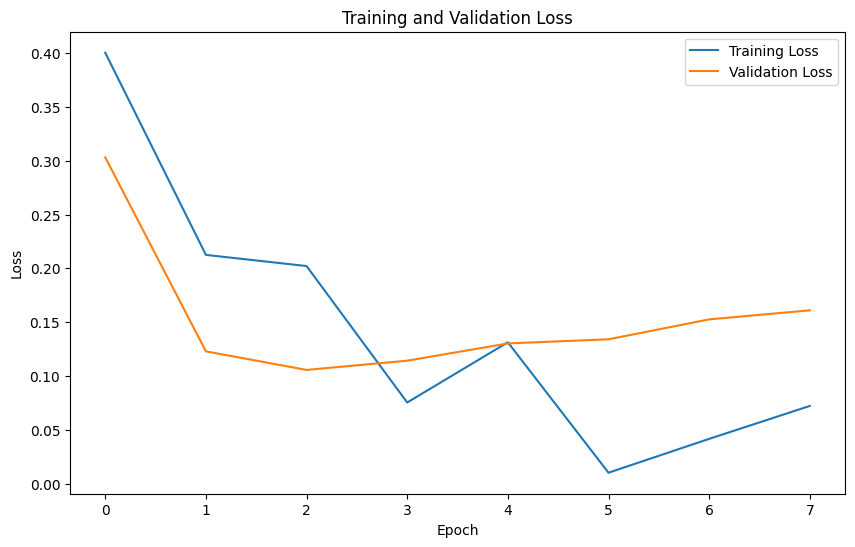

Accuracy: 0.9542
[('URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.', 'scam'), ("Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.", 'scam'), ('Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!', 'scam'), ('ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.', 'scam'), ("You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.", 'ham'), ('FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.', 'scam'), ('Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.', 'scam'), ('Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!', 'scam'), ('Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800-

In [25]:
#model 1

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pickle

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Ensure only two columns: 'v1' (label) and 'v2' (message)
data = data[['v1', 'v2']]

# Step 1: Level 1 - Check for missing or empty values in 'v2'
print("Level 1: Checking for missing or empty values...")
missing_values = data['v2'].isnull().sum()
empty_messages = (data['v2'].str.strip() == '').sum()
print(f"Missing values: {missing_values}, Empty messages: {empty_messages}")
data['v2'].fillna('', inplace=True)

# Step 2: Level 2 - Check for duplicate messages
print("Level 2: Checking for duplicate messages...")
duplicate_count = data.duplicated(subset=['v2']).sum()
print(f"Duplicate messages: {duplicate_count}")
data.drop_duplicates(subset=['v2'], inplace=True)

# Step 3: Level 3 - Check for messages classified as 'scam' containing scam-like keywords or suspicious patterns
print("Level 3: Checking for scam messages with scam-like content...")
scam_keywords = ['prize', 'gift', 'cash', 'click', 'link', 'win', 'free', 'congratulations', 'urgent', 'limited']
has_suspicious_content = data.apply(lambda row: any(keyword in row['v2'].lower() for keyword in scam_keywords) if row['v1'].lower() == 'scam' else True, axis=1)
suspicious_message_count = (~has_suspicious_content).sum()
print(f"Messages labeled as 'scam' without suspicious content: {suspicious_message_count}")

# Filter out scam messages that don't pass the content check (optional, based on your needs)
data = data[has_suspicious_content]

# Preprocess label data (v1 -> 1 for scam, 0 for ham)
y = data['v1'].apply(lambda x: 1 if x.lower() == 'scam' else 0)

# Step 4: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], y, test_size=0.2, random_state=42)

# Step 5: Convert text to numerical values using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the RNN model
class SMSRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SMSRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)  # * 2 for bidirectional
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = torch.sigmoid(self.fc(out))
        return out

# Define model parameters
input_size = X_train_vectorized.shape[1]
hidden_size = 128
num_layers = 2
model = SMSRNN(input_size, hidden_size, num_layers)

# Set the criterion and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 5
best_loss = float('inf')
patience_counter = 0

# Train the model
epochs = 50
losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # Add sequence dimension
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_inputs = X_test_tensor.unsqueeze(1)
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)

    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_sms_scam_detection_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    val_inputs = X_test_tensor.unsqueeze(1)
    outputs = model(val_inputs).squeeze()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy:.4f}')

# Save the vectorizer to Google Drive
vectorizer_save_path = '/content/drive/MyDrive/sms_tfidf_vectorizer.pkl'
with open(vectorizer_save_path, 'wb') as f:
    pickle.dump(vectorizer, f)

# Prediction functions
def preprocess_sms(message, vectorizer):
    message_vectorized = vectorizer.transform([message])
    message_tensor = torch.tensor(message_vectorized.toarray(), dtype=torch.float32).unsqueeze(1)
    return message_tensor

def predict_sms(model, message_tensor):
    model.eval()
    with torch.no_grad():
        output = model(message_tensor)
        prediction = (output > 0.5).float().item()
    return prediction

def interpret_prediction(prediction):
    return 'scam' if prediction == 1 else 'ham'

def check_messages(model, messages, vectorizer):
    results = []
    for message in messages:
        message_tensor = preprocess_sms(message, vectorizer)
        prediction = predict_sms(model, message_tensor)
        result = interpret_prediction(prediction)
        results.append((message, result))
    return results

# Example new messages for testing
new_messages = [
     "URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.",
    "Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.",
    "Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!",
    "ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.",
    "You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.",
    "FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.",
    "Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.",
    "Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!",
    "Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800-XXX-XXXX.",
    "ACT NOW: You've been pre-approved for a $5,000 loan. Click here to secure the funds, no credit check required!",
    "Dear user, verify your account within 24 hours or it will be suspended. Click here to verify.",
    "Important: Your email account will be deactivated unless you confirm your password immediately.",
    "Congratulations! You've been selected for a cash prize of $5,000! Provide your bank details to claim it.",
    "Get your {product} for a limited time at 80% off! Click this link before it runs out!",
    "We've detected unusual activity on your {service} account. Verify your identity here to avoid being locked out.",
    "Last chance to claim your free gift card worth $100! Click here to claim it now!",
    "Warning! Your {bank} account has been compromised. Please log in to secure it immediately.",
    "You are eligible for a complimentary vacation! Respond to this email to find out more.",
    "Hey! Your friend {friend_name} sent you money through {payment_service}. Click here to claim it!",
    "Your {store} order has been canceled due to an issue. Resolve it here to prevent loss.",
    "You have been selected for a government grant of $10,000. Click here to apply now!",
    "Your {insurance} policy is set to expire soon! Click here to renew it instantly.",
    "An issue occurred with your recent payment. Update your payment information here immediately!",
    "Congrats! You’re the lucky winner of a free {product}! Click to claim it before it’s gone.",
    "Your subscription has been renewed automatically. Click here to get a refund for the last charge.",
    "You’ve received an urgent refund of $200. Please provide your bank details to process it.",
    "Hey there! We need to verify your account for your recent purchase. Click here now!",
    "Important security update: Verify your account to prevent it from being suspended.",
    "Your loan application has been approved! Click to get your funds now without a credit check.",
    "You’ve been randomly selected for a gift voucher! Click the link to claim yours quickly.",
    "Attention! Your {streaming_service} account is at risk of suspension. Reactivate it now to keep access.",
    "Important message: Your email has been flagged for suspicious activity. Click to confirm your identity.",
    "You've been selected for a survey! Complete it for a chance to win a $100 gift card.",
    "Dear customer, there’s an urgent message from {bank}. Log in now using this link: [link].",
    "You have an impending balance of $300. Verify your account immediately to prevent penalties.",
    "Hurry! Claim your exclusive VIP access to our premium site by clicking here.",
    "Important: Your email account is at risk due to suspicious activity. Confirm your identity here.",
    "Congratulations! You’re eligible for a free month of {service}. Click to claim it!",
    "URGENT: Your payment for {service} was not processed. Update your information to continue.",
    "You've been chosen for a complimentary trial of our premium service! Sign up now!",
    "Last day to redeem your $50 discount on your next purchase! Click here.",
    "Notification: A new device has logged into your account. Confirm it was you or secure your account.",
    "You qualify for government assistance! Click to find out how much you can receive today.",
    "Important: Your {subscription_service} account is about to expire! Renew now to avoid interruption.",
    "Alert: A refund of $150 is awaiting you. Click here to process it!",
    "You are a valued customer! Check out these exclusive offers just for you: [link].",
    "Your {wallet_service} account has unusual activity. Log in to confirm your identity.",
    "Great news! You’ve been chosen to receive half off your next purchase at {store}! Click to redeem.",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You've won a free ticket to {event_name}. Click here for details.",
    "Act fast: You have a $100 gift card waiting for you! Claim it now before it expires.",
    "I just finished my project! Can’t wait to share it with you this weekend.",
    "Hi! Just wanted to check if you’re available for dinner tonight. Let me know!",
    "Don't forget to pick up groceries after work! List includes milk, bread, and eggs.",
    "Your package from Amazon has been delivered! Check it at your doorstep now.",
    "Hi! Just wanted to share this recipe with you; I think you’ll love it!",
    "Safety alert! Your fitness tracker shows unusual activity. Log in to check your health stats.",
    "Friendly reminder: Your doctor’s appointment is next Thursday at 3 PM.",
    "Your registration for the cooking class is confirmed! Looking forward to seeing you there.",
    "You’ve been selected for a cash prize of $1,000! Provide your information to claim it now!",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You are the winner of a free vacation for two! Respond to claim it.",
    "ALERT: Your Netflix account has been suspended. Click to verify your payment info.",
    "You have a pending payment of $300. Please confirm your payment method immediately.",
    "Your {food_delivery} order has arrived! Enjoy your meal!",
    "You've been invited to join an exclusive club! Click here to sign up for free.",
    "Important update: Your LinkedIn profile was viewed by someone. Click to review.",
    "Your account has been locked due to suspicious activity. Click this link to unlock it now.",
    "Congratulations! You've won a free vacation! Click here for details on how to claim it.",
    "Act fast: Limited spots available for our webinar tomorrow! Register now!",
    "You have 1 new friend request from someone you may know! Click to see their profile.",
    "Your subscription will auto-renew on {date}. Update your payment info to avoid issues.",
    "I found a great deal on travel insurance. Want me to send you the link?",
    "Important: Your {bank} account is about to be suspended! Click here to verify your identity.",
    "You're invited to participate in our exclusive promo! Click to join now.",
    "You qualify for an all-expenses-paid trip! Click here to find out more.",
    "ALERT: Multiple failed login attempts on your account. Please reset your password immediately.",
    "Congratulations! You've been chosen for an exclusive trial of our premium service! Sign up now!",
    "Important: Update your payment info to prevent service interruption.",
    "You've been selected for a market research survey! Earn rewards by participating."
     "Hi! Just wanted to let you know that I'll be late for dinner tonight. See you around 7!",
    "Don't forget about our meeting tomorrow at 10 AM. Let me know if you need any materials prepared.",
    "I found that book you were looking for at the library. I'll bring it when I come over this weekend.",
    "Just checking in to see how you're doing. It's been a while since we last caught up!",
    "Your reminder for the dentist appointment is set for next Thursday at 3 PM.",
    "Hey, I sent you an email with the details for the trip. Let me know what you think!",
    "Thank you for your payment! Your order is being processed and will be shipped soon.",
    "Happy Birthday! Hope you have a fantastic day filled with cake and fun!",
    "Your subscription to the monthly newsletter is confirmed. Enjoy the upcoming articles!",
    "Just a friendly reminder that your car service is scheduled for this Friday at 2 PM.",
    "Loved the movie we watched last night! Let's do that again soon.",
    "Can you pick up some groceries on your way home? I need milk and eggs.",
    "Your favorite restaurant has a special promotion this weekend. We should check it out!",
    "Just got back from my trip! Can't wait to share the photos with you.",
    "Thanks for helping me with the project last week. I really appreciate it!",
    "Your package has been delivered! It's waiting at the front door.",
    "Let’s have a coffee catch-up next week! When are you free?",
    "I was thinking about going for a hike this weekend. Would you like to join?",
    "Just wanted to share this article I found interesting. I think you’d like it too!",
    "Your appointment with Dr. Smith is confirmed for next Wednesday at 11 AM.",
    "Great job on the presentation! You were really impressive.",
    "I've made plans for the weekend. Let me know if you want to join!",
    "Your support ticket has been resolved. Thank you for your patience!",
    "I've attached the document you requested. Let me know if you need anything else.",
    "Looking forward to our game night on Friday! Bring your favorite snacks.",
    "I tried that recipe you suggested, and it turned out delicious! Thank you!",
    "The book club will meet next Thursday at my place. Hope you can make it!",
    "I completed the report and will send it out for review by the end of the day.",
    "Your feedback on the draft would be greatly appreciated. Let me know what you think!",
    "Plans for this month’s family gathering are in the works. More details soon!",
    "I'm thinking of starting a new series to watch. Any recommendations?",
    "I just finished my project! Can't wait to show you what I've been working on.",
    "Could you send me your address again? I want to send you something special.",
    "I received your gift in the mail today! Thank you so much, it was very thoughtful.",
    "Let's set up a time to discuss our upcoming event. When are you available?",
    "I’m planning a little barbecue at my place this Saturday. Hope you can join!",
    "Did you hear back about the job? I'm rooting for you!",
    "Just a little check-in! How’s everything going on your end?",
    "The concert tickets arrived! Can't wait for the show next month.",
    "I'm interested in taking that yoga class with you. Sign me up!",
    "Just finished my workout. How is your fitness routine going?",
    "Excited for the vacation next month! We need to finalize the itinerary.",
    "Thanks for sharing that playlist! I've been listening to it all week.",
    "Can we reschedule our meeting to next Wednesday? Something came up.",
    "I just wanted to say how much I enjoy our chats. They always brighten my day!",
    "Don't forget to bring your laptop for the workshop next week.",
    "The movie night was a blast! We should do that again soon.",
    "Your feedback was valuable in the last meeting. Thanks for speaking up!",
    "Let's plan a trip to the beach before summer is over!",
    "I found a great deal on flights. Want me to send you the details?",
    "I think your suggestion for the project is spot on! Let's implement it.",
    "Looking forward to the family reunion next month! It'll be great to see everyone.",
    "Hi! Just remembered to send you that article we talked about last time.",
    "Remember to take your umbrella today. It might rain later.",
    "Can you believe it’s been so long since we last met? Let’s schedule something soon.",
    "I’ve been thinking about getting a pet. Any advice?",
    "We should catch up over coffee soon! What does your schedule look like?",
    "I finally watched that movie you recommended. It was fantastic!",
    "Your presence is missed at our weekly meetings. Hope you can make it next time!",
    "Thank you for your help with the fundraiser. We raised more than expected!",
    "Just a friendly reminder for our meeting this Friday at 3 PM.",
    "Your feedback on this week's team project would be greatly appreciated.",
    "I hope your week is going well! Looking forward to catching up soon.",
    "We’re having a potluck next weekend! Bring your favorite dish!",
    "I just finished reading a great book and I think you'll love it too!",
    "Let’s make plans to go hiking next weekend. The weather should be perfect!",
    "I'm trying out a new restaurant this week. Would you like to join?",
    "Your recent purchase has shipped! Track it here: {tracking_link}."
]
results = check_messages(model, new_messages, vectorizer)
print(results)


Epoch [1/100], Loss: 0.3505, Val Loss: 0.2984
Epoch [2/100], Loss: 0.2763, Val Loss: 0.1189
Epoch [3/100], Loss: 0.0795, Val Loss: 0.1048
Epoch [4/100], Loss: 0.0861, Val Loss: 0.1106
Epoch [5/100], Loss: 0.0677, Val Loss: 0.1265
Epoch [6/100], Loss: 0.0034, Val Loss: 0.1439
Epoch [7/100], Loss: 0.0670, Val Loss: 0.1414
Epoch [8/100], Loss: 0.0245, Val Loss: 0.1564
Early stopping triggered


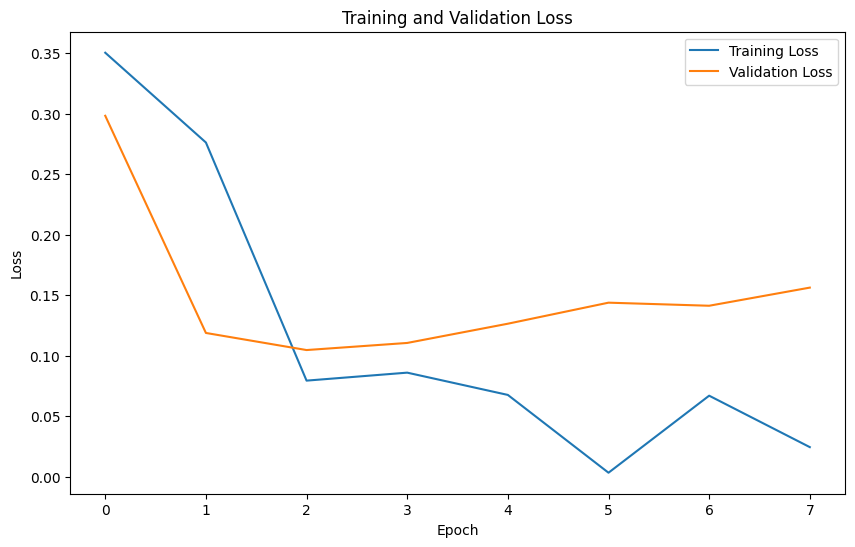

Accuracy: 0.9533
[('URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.', 'scam'), ("Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.", 'scam'), ('Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!', 'scam'), ('ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.', 'scam'), ("You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.", 'ham'), ('FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.', 'scam'), ('Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.', 'scam'), ('Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!', 'scam'), ('Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800-

In [26]:
#model 2

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pickle

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Ensure only two columns: 'v1' (label) and 'v2' (message)
data = data[['v1', 'v2']]

# Step 1: Check for missing or empty values in 'v2'
data['v2'].fillna('', inplace=True)

# Step 2: Check for duplicate messages
data.drop_duplicates(subset=['v2'], inplace=True)

# Step 3: Check for messages classified as 'scam' containing scam-like keywords
scam_keywords = ['prize', 'gift', 'cash', 'click', 'link', 'win', 'free', 'congratulations', 'urgent', 'limited']
has_suspicious_content = data.apply(lambda row: any(keyword in row['v2'].lower() for keyword in scam_keywords) if row['v1'].lower() == 'scam' else True, axis=1)

# Filter out scam messages that don't pass the content check
data = data[has_suspicious_content]

# Preprocess label data (v1 -> 1 for scam, 0 for ham)
y = data['v1'].apply(lambda x: 1 if x.lower() == 'scam' else 0)

# Step 4: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], y, test_size=0.2, random_state=42)

# Step 5: Convert text to numerical values using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the RNN model
class SMSRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SMSRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)  # * 2 for bidirectional
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = torch.sigmoid(self.fc(out))
        return out

# Define model parameters
input_size = X_train_vectorized.shape[1]
hidden_size = 128
num_layers = 2
model = SMSRNN(input_size, hidden_size, num_layers)

# Set the criterion and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 5
best_loss = float('inf')
patience_counter = 0

# Train the model
epochs = 100  # Increased epochs for better training
losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # Add sequence dimension
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_inputs = X_test_tensor.unsqueeze(1)  # Add sequence dimension
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)

    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_sms_scam_detection_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    val_inputs = X_test_tensor.unsqueeze(1)  # Add sequence dimension
    outputs = model(val_inputs).squeeze()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy:.4f}')

# Save the vectorizer to Google Drive
vectorizer_save_path = '/content/drive/MyDrive/sms_tfidf_vectorizer.pkl'
with open(vectorizer_save_path, 'wb') as f:
    pickle.dump(vectorizer, f)

# Prediction functions
def preprocess_sms(message, vectorizer):
    message_vectorized = vectorizer.transform([message])
    message_tensor = torch.tensor(message_vectorized.toarray(), dtype=torch.float32).unsqueeze(1)
    return message_tensor

def predict_sms(model, message_tensor):
    model.eval()
    with torch.no_grad():
        output = model(message_tensor)
        prediction = (output > 0.5).float().item()
    return prediction

def interpret_prediction(prediction):
    return 'scam' if prediction == 1 else 'ham'

def check_messages(model, messages, vectorizer):
    results = []
    for message in messages:
        message_tensor = preprocess_sms(message, vectorizer)
        prediction = predict_sms(model, message_tensor)
        result = interpret_prediction(prediction)
        results.append((message, result))
    return results

# Example new messages for testing
new_messages = [
    "URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.",
    "Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.",
    "Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!",
    "ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.",
    "You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.",
    "FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.",
    "Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.",
    "Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!",
    "Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800-XXX-XXXX.",
    "ACT NOW: You've been pre-approved for a $5,000 loan. Click here to secure the funds, no credit check required!",
    "Dear user, verify your account within 24 hours or it will be suspended. Click here to verify.",
    "Important: Your email account will be deactivated unless you confirm your password immediately.",
    "Congratulations! You've been selected for a cash prize of $5,000! Provide your bank details to claim it.",
    "Get your {product} for a limited time at 80% off! Click this link before it runs out!",
    "We've detected unusual activity on your {service} account. Verify your identity here to avoid being locked out.",
    "Last chance to claim your free gift card worth $100! Click here to claim it now!",
    "Warning! Your {bank} account has been compromised. Please log in to secure it immediately.",
    "You are eligible for a complimentary vacation! Respond to this email to find out more.",
    "Hey! Your friend {friend_name} sent you money through {payment_service}. Click here to claim it!",
    "Your {store} order has been canceled due to an issue. Resolve it here to prevent loss.",
    "You have been selected for a government grant of $10,000. Click here to apply now!",
    "Your {insurance} policy is set to expire soon! Click here to renew it instantly.",
    "An issue occurred with your recent payment. Update your payment information here immediately!",
    "Congrats! You’re the lucky winner of a free {product}! Click to claim it before it’s gone.",
    "Your subscription has been renewed automatically. Click here to get a refund for the last charge.",
    "You’ve received an urgent refund of $200. Please provide your bank details to process it.",
    "Hey there! We need to verify your account for your recent purchase. Click here now!",
    "Important security update: Verify your account to prevent it from being suspended.",
    "Your loan application has been approved! Click to get your funds now without a credit check.",
    "You’ve been randomly selected for a gift voucher! Click the link to claim yours quickly.",
    "Attention! Your {streaming_service} account is at risk of suspension. Reactivate it now to keep access.",
    "Important message: Your email has been flagged for suspicious activity. Click to confirm your identity.",
    "You've been selected for a survey! Complete it for a chance to win a $100 gift card.",
    "Dear customer, there’s an urgent message from {bank}. Log in now using this link: [link].",
    "You have an impending balance of $300. Verify your account immediately to prevent penalties.",
    "Hurry! Claim your exclusive VIP access to our premium site by clicking here.",
    "Important: Your email account is at risk due to suspicious activity. Confirm your identity here.",
    "Congratulations! You’re eligible for a free month of {service}. Click to claim it!",
    "URGENT: Your payment for {service} was not processed. Update your information to continue.",
    "You've been chosen for a complimentary trial of our premium service! Sign up now!",
    "Last day to redeem your $50 discount on your next purchase! Click here.",
    "Notification: A new device has logged into your account. Confirm it was you or secure your account.",
    "You qualify for government assistance! Click to find out how much you can receive today.",
    "Important: Your {subscription_service} account is about to expire! Renew now to avoid interruption.",
    "Alert: A refund of $150 is awaiting you. Click here to process it!",
    "You are a valued customer! Check out these exclusive offers just for you: [link].",
    "Your {wallet_service} account has unusual activity. Log in to confirm your identity.",
    "Great news! You’ve been chosen to receive half off your next purchase at {store}! Click to redeem.",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You've won a free ticket to {event_name}. Click here for details.",
    "Act fast: You have a $100 gift card waiting for you! Claim it now before it expires.",
    "I just finished my project! Can’t wait to share it with you this weekend.",
    "Hi! Just wanted to check if you’re available for dinner tonight. Let me know!",
    "Don't forget to pick up groceries after work! List includes milk, bread, and eggs.",
    "Your package from Amazon has been delivered! Check it at your doorstep now.",
    "Hi! Just wanted to share this recipe with you; I think you’ll love it!",
    "Safety alert! Your fitness tracker shows unusual activity. Log in to check your health stats.",
    "Friendly reminder: Your doctor’s appointment is next Thursday at 3 PM.",
    "Your registration for the cooking class is confirmed! Looking forward to seeing you there.",
    "You’ve been selected for a cash prize of $1,000! Provide your information to claim it now!",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You are the winner of a free vacation for two! Respond to claim it.",
    "ALERT: Your Netflix account has been suspended. Click to verify your payment info.",
    "You have a pending payment of $300. Please confirm your payment method immediately.",
    "Your {food_delivery} order has arrived! Enjoy your meal!",
    "You've been invited to join an exclusive club! Click here to sign up for free.",
    "Important update: Your LinkedIn profile was viewed by someone. Click to review.",
    "Your account has been locked due to suspicious activity. Click this link to unlock it now.",
    "Congratulations! You've won a free vacation! Click here for details on how to claim it.",
    "Act fast: Limited spots available for our webinar tomorrow! Register now!",
    "You have 1 new friend request from someone you may know! Click to see their profile.",
    "Your subscription will auto-renew on {date}. Update your payment info to avoid issues.",
    "I found a great deal on travel insurance. Want me to send you the link?",
    "Important: Your {bank} account is about to be suspended! Click here to verify your identity.",
    "You're invited to participate in our exclusive promo! Click to join now.",
    "You qualify for an all-expenses-paid trip! Click here to find out more.",
    "ALERT: Multiple failed login attempts on your account. Please reset your password immediately.",
    "Congratulations! You've been chosen for an exclusive trial of our premium service! Sign up now!",
    "Important: Update your payment info to prevent service interruption.",
    "You've been selected for a market research survey! Earn rewards by participating."
     "Hi! Just wanted to let you know that I'll be late for dinner tonight. See you around 7!",
    "Don't forget about our meeting tomorrow at 10 AM. Let me know if you need any materials prepared.",
    "I found that book you were looking for at the library. I'll bring it when I come over this weekend.",
    "Just checking in to see how you're doing. It's been a while since we last caught up!",
    "Your reminder for the dentist appointment is set for next Thursday at 3 PM.",
    "Hey, I sent you an email with the details for the trip. Let me know what you think!",
    "Thank you for your payment! Your order is being processed and will be shipped soon.",
    "Happy Birthday! Hope you have a fantastic day filled with cake and fun!",
    "Your subscription to the monthly newsletter is confirmed. Enjoy the upcoming articles!",
    "Just a friendly reminder that your car service is scheduled for this Friday at 2 PM.",
    "Loved the movie we watched last night! Let's do that again soon.",
    "Can you pick up some groceries on your way home? I need milk and eggs.",
    "Your favorite restaurant has a special promotion this weekend. We should check it out!",
    "Just got back from my trip! Can't wait to share the photos with you.",
    "Thanks for helping me with the project last week. I really appreciate it!",
    "Your package has been delivered! It's waiting at the front door.",
    "Let’s have a coffee catch-up next week! When are you free?",
    "I was thinking about going for a hike this weekend. Would you like to join?",
    "Just wanted to share this article I found interesting. I think you’d like it too!",
    "Your appointment with Dr. Smith is confirmed for next Wednesday at 11 AM.",
    "Great job on the presentation! You were really impressive.",
    "I've made plans for the weekend. Let me know if you want to join!",
    "Your support ticket has been resolved. Thank you for your patience!",
    "I've attached the document you requested. Let me know if you need anything else.",
    "Looking forward to our game night on Friday! Bring your favorite snacks.",
    "I tried that recipe you suggested, and it turned out delicious! Thank you!",
    "The book club will meet next Thursday at my place. Hope you can make it!",
    "I completed the report and will send it out for review by the end of the day.",
    "Your feedback on the draft would be greatly appreciated. Let me know what you think!",
    "Plans for this month’s family gathering are in the works. More details soon!",
    "I'm thinking of starting a new series to watch. Any recommendations?",
    "I just finished my project! Can't wait to show you what I've been working on.",
    "Could you send me your address again? I want to send you something special.",
    "I received your gift in the mail today! Thank you so much, it was very thoughtful.",
    "Let's set up a time to discuss our upcoming event. When are you available?",
    "I’m planning a little barbecue at my place this Saturday. Hope you can join!",
    "Did you hear back about the job? I'm rooting for you!",
    "Just a little check-in! How’s everything going on your end?",
    "The concert tickets arrived! Can't wait for the show next month.",
    "I'm interested in taking that yoga class with you. Sign me up!",
    "Just finished my workout. How is your fitness routine going?",
    "Excited for the vacation next month! We need to finalize the itinerary.",
    "Thanks for sharing that playlist! I've been listening to it all week.",
    "Can we reschedule our meeting to next Wednesday? Something came up.",
    "I just wanted to say how much I enjoy our chats. They always brighten my day!",
    "Don't forget to bring your laptop for the workshop next week.",
    "The movie night was a blast! We should do that again soon.",
    "Your feedback was valuable in the last meeting. Thanks for speaking up!",
    "Let's plan a trip to the beach before summer is over!",
    "I found a great deal on flights. Want me to send you the details?",
    "I think your suggestion for the project is spot on! Let's implement it.",
    "Looking forward to the family reunion next month! It'll be great to see everyone.",
    "Hi! Just remembered to send you that article we talked about last time.",
    "Remember to take your umbrella today. It might rain later.",
    "Can you believe it’s been so long since we last met? Let’s schedule something soon.",
    "I’ve been thinking about getting a pet. Any advice?",
    "We should catch up over coffee soon! What does your schedule look like?",
    "I finally watched that movie you recommended. It was fantastic!",
    "Your presence is missed at our weekly meetings. Hope you can make it next time!",
    "Thank you for your help with the fundraiser. We raised more than expected!",
    "Just a friendly reminder for our meeting this Friday at 3 PM.",
    "Your feedback on this week's team project would be greatly appreciated.",
    "I hope your week is going well! Looking forward to catching up soon.",
    "We’re having a potluck next weekend! Bring your favorite dish!",
    "I just finished reading a great book and I think you'll love it too!",
    "Let’s make plans to go hiking next weekend. The weather should be perfect!",
    "I'm trying out a new restaurant this week. Would you like to join?",
    "Your recent purchase has shipped! Track it here: {tracking_link}."
]
results = check_messages(model, new_messages, vectorizer)
print(results)


In [ ]:
#model 3

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pickle
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Preprocess text data
data['v2'].fillna('', inplace=True)

# Preprocess label data
y = data['v1'].apply(lambda x: 1 if x.lower() == 'scam' else 0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data['v2'], y, test_size=0.2, random_state=42)

# Convert text to numerical values
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the RNN model
class SMSRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SMSRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)  # * 2 for bidirectional
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # * 2 for bidirectional
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)

        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))

        # Get the last output
        out = self.dropout(out[:, -1, :])

        # Fully connected layer
        out = torch.sigmoid(self.fc(out))
        return out

input_size = X_train_vectorized.shape[1]
hidden_size = 128
num_layers = 2
model = SMSRNN(input_size, hidden_size, num_layers)

# Set the criterion and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 5
best_loss = float('inf')
patience_counter = 0

# Train the model
epochs = 50
losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # Add a sequence dimension
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_inputs = X_test_tensor.unsqueeze(1)  # Add a sequence dimension
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)

    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_sms_scam_detection_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    val_inputs = X_test_tensor.unsqueeze(1)  # Add a sequence dimension
    outputs = model(val_inputs).squeeze()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy:.4f}')

# Save the vectorizer to Google Drive
vectorizer_save_path = '/content/drive/MyDrive/sms_tfidf_vectorizer.pkl'
with open(vectorizer_save_path, 'wb') as f:
    pickle.dump(vectorizer, f)

# Prediction functions
def preprocess_sms(message, vectorizer):
    message_vectorized = vectorizer.transform([message])
    message_tensor = torch.tensor(message_vectorized.toarray(), dtype=torch.float32).unsqueeze(1)
    return message_tensor

def predict_sms(model, message_tensor):
    model.eval()
    with torch.no_grad():
        output = model(message_tensor)
        prediction = (output > 0.5).float().item()
    return prediction

def interpret_prediction(prediction):
    return 'scam' if prediction == 1 else 'ham'

def check_messages(model, messages, vectorizer):
    results = []
    for message in messages:
        message_tensor = preprocess_sms(message, vectorizer)
        prediction = predict_sms(model, message_tensor)
        result = interpret_prediction(prediction)
        results.append((message, result))
    return results

# Example new messages for testing
new_messages = [
  "URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.",
    "Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.",
    "Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!",
    "ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.",
    "You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.",
    "FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.",
    "Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.",
    "Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!",
    "Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800-XXX-XXXX.",
    "ACT NOW: You've been pre-approved for a $5,000 loan. Click here to secure the funds, no credit check required!",
    "Dear user, verify your account within 24 hours or it will be suspended. Click here to verify.",
    "Important: Your email account will be deactivated unless you confirm your password immediately.",
    "Congratulations! You've been selected for a cash prize of $5,000! Provide your bank details to claim it.",
    "Get your {product} for a limited time at 80% off! Click this link before it runs out!",
    "We've detected unusual activity on your {service} account. Verify your identity here to avoid being locked out.",
    "Last chance to claim your free gift card worth $100! Click here to claim it now!",
    "Warning! Your {bank} account has been compromised. Please log in to secure it immediately.",
    "You are eligible for a complimentary vacation! Respond to this email to find out more.",
    "Hey! Your friend {friend_name} sent you money through {payment_service}. Click here to claim it!",
    "Your {store} order has been canceled due to an issue. Resolve it here to prevent loss.",
    "You have been selected for a government grant of $10,000. Click here to apply now!",
    "Your {insurance} policy is set to expire soon! Click here to renew it instantly.",
    "An issue occurred with your recent payment. Update your payment information here immediately!",
    "Congrats! You’re the lucky winner of a free {product}! Click to claim it before it’s gone.",
    "Your subscription has been renewed automatically. Click here to get a refund for the last charge.",
    "You’ve received an urgent refund of $200. Please provide your bank details to process it.",
    "Hey there! We need to verify your account for your recent purchase. Click here now!",
    "Important security update: Verify your account to prevent it from being suspended.",
    "Your loan application has been approved! Click to get your funds now without a credit check.",
    "You’ve been randomly selected for a gift voucher! Click the link to claim yours quickly.",
    "Attention! Your {streaming_service} account is at risk of suspension. Reactivate it now to keep access.",
    "Important message: Your email has been flagged for suspicious activity. Click to confirm your identity.",
    "You've been selected for a survey! Complete it for a chance to win a $100 gift card.",
    "Dear customer, there’s an urgent message from {bank}. Log in now using this link: [link].",
    "You have an impending balance of $300. Verify your account immediately to prevent penalties.",
    "Hurry! Claim your exclusive VIP access to our premium site by clicking here.",
    "Important: Your email account is at risk due to suspicious activity. Confirm your identity here.",
    "Congratulations! You’re eligible for a free month of {service}. Click to claim it!",
    "URGENT: Your payment for {service} was not processed. Update your information to continue.",
    "You've been chosen for a complimentary trial of our premium service! Sign up now!",
    "Last day to redeem your $50 discount on your next purchase! Click here.",
    "Notification: A new device has logged into your account. Confirm it was you or secure your account.",
    "You qualify for government assistance! Click to find out how much you can receive today.",
    "Important: Your {subscription_service} account is about to expire! Renew now to avoid interruption.",
    "Alert: A refund of $150 is awaiting you. Click here to process it!",
    "You are a valued customer! Check out these exclusive offers just for you: [link].",
    "Your {wallet_service} account has unusual activity. Log in to confirm your identity.",
    "Great news! You’ve been chosen to receive half off your next purchase at {store}! Click to redeem.",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You've won a free ticket to {event_name}. Click here for details.",
    "Act fast: You have a $100 gift card waiting for you! Claim it now before it expires.",
    "I just finished my project! Can’t wait to share it with you this weekend.",
    "Hi! Just wanted to check if you’re available for dinner tonight. Let me know!",
    "Don't forget to pick up groceries after work! List includes milk, bread, and eggs.",
    "Your package from Amazon has been delivered! Check it at your doorstep now.",
    "Hi! Just wanted to share this recipe with you; I think you’ll love it!",
    "Safety alert! Your fitness tracker shows unusual activity. Log in to check your health stats.",
    "Friendly reminder: Your doctor’s appointment is next Thursday at 3 PM.",
    "Your registration for the cooking class is confirmed! Looking forward to seeing you there.",
    "You’ve been selected for a cash prize of $1,000! Provide your information to claim it now!",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You are the winner of a free vacation for two! Respond to claim it.",
    "ALERT: Your Netflix account has been suspended. Click to verify your payment info.",
    "You have a pending payment of $300. Please confirm your payment method immediately.",
    "Your {food_delivery} order has arrived! Enjoy your meal!",
    "You've been invited to join an exclusive club! Click here to sign up for free.",
    "Important update: Your LinkedIn profile was viewed by someone. Click to review.",
    "Your account has been locked due to suspicious activity. Click this link to unlock it now.",
    "Congratulations! You've won a free vacation! Click here for details on how to claim it.",
    "Act fast: Limited spots available for our webinar tomorrow! Register now!",
    "You have 1 new friend request from someone you may know! Click to see their profile.",
    "Your subscription will auto-renew on {date}. Update your payment info to avoid issues.",
    "I found a great deal on travel insurance. Want me to send you the link?",
    "Important: Your {bank} account is about to be suspended! Click here to verify your identity.",
    "You're invited to participate in our exclusive promo! Click to join now.",
    "You qualify for an all-expenses-paid trip! Click here to find out more.",
    "ALERT: Multiple failed login attempts on your account. Please reset your password immediately.",
    "Congratulations! You've been chosen for an exclusive trial of our premium service! Sign up now!",
    "Important: Update your payment info to prevent service interruption.",
    "You've been selected for a market research survey! Earn rewards by participating."
     "Hi! Just wanted to let you know that I'll be late for dinner tonight. See you around 7!",
    "Don't forget about our meeting tomorrow at 10 AM. Let me know if you need any materials prepared.",
    "I found that book you were looking for at the library. I'll bring it when I come over this weekend.",
    "Just checking in to see how you're doing. It's been a while since we last caught up!",
    "Your reminder for the dentist appointment is set for next Thursday at 3 PM.",
    "Hey, I sent you an email with the details for the trip. Let me know what you think!",
    "Thank you for your payment! Your order is being processed and will be shipped soon.",
    "Happy Birthday! Hope you have a fantastic day filled with cake and fun!",
    "Your subscription to the monthly newsletter is confirmed. Enjoy the upcoming articles!",
    "Just a friendly reminder that your car service is scheduled for this Friday at 2 PM.",
    "Loved the movie we watched last night! Let's do that again soon.",
    "Can you pick up some groceries on your way home? I need milk and eggs.",
    "Your favorite restaurant has a special promotion this weekend. We should check it out!",
    "Just got back from my trip! Can't wait to share the photos with you.",
    "Thanks for helping me with the project last week. I really appreciate it!",
    "Your package has been delivered! It's waiting at the front door.",
    "Let’s have a coffee catch-up next week! When are you free?",
    "I was thinking about going for a hike this weekend. Would you like to join?",
    "Just wanted to share this article I found interesting. I think you’d like it too!",
    "Your appointment with Dr. Smith is confirmed for next Wednesday at 11 AM.",
    "Great job on the presentation! You were really impressive.",
    "I've made plans for the weekend. Let me know if you want to join!",
    "Your support ticket has been resolved. Thank you for your patience!",
    "I've attached the document you requested. Let me know if you need anything else.",
    "Looking forward to our game night on Friday! Bring your favorite snacks.",
    "I tried that recipe you suggested, and it turned out delicious! Thank you!",
    "The book club will meet next Thursday at my place. Hope you can make it!",
    "I completed the report and will send it out for review by the end of the day.",
    "Your feedback on the draft would be greatly appreciated. Let me know what you think!",
    "Plans for this month’s family gathering are in the works. More details soon!",
    "I'm thinking of starting a new series to watch. Any recommendations?",
    "I just finished my project! Can't wait to show you what I've been working on.",
    "Could you send me your address again? I want to send you something special.",
    "I received your gift in the mail today! Thank you so much, it was very thoughtful.",
    "Let's set up a time to discuss our upcoming event. When are you available?",
    "I’m planning a little barbecue at my place this Saturday. Hope you can join!",
    "Did you hear back about the job? I'm rooting for you!",
    "Just a little check-in! How’s everything going on your end?",
    "The concert tickets arrived! Can't wait for the show next month.",
    "I'm interested in taking that yoga class with you. Sign me up!",
    "Just finished my workout. How is your fitness routine going?",
    "Excited for the vacation next month! We need to finalize the itinerary.",
    "Thanks for sharing that playlist! I've been listening to it all week.",
    "Can we reschedule our meeting to next Wednesday? Something came up.",
    "I just wanted to say how much I enjoy our chats. They always brighten my day!",
    "Don't forget to bring your laptop for the workshop next week.",
    "The movie night was a blast! We should do that again soon.",
    "Your feedback was valuable in the last meeting. Thanks for speaking up!",
    "Let's plan a trip to the beach before summer is over!",
    "I found a great deal on flights. Want me to send you the details?",
    "I think your suggestion for the project is spot on! Let's implement it.",
    "Looking forward to the family reunion next month! It'll be great to see everyone.",
    "Hi! Just remembered to send you that article we talked about last time.",
    "Remember to take your umbrella today. It might rain later.",
    "Can you believe it’s been so long since we last met? Let’s schedule something soon.",
    "I’ve been thinking about getting a pet. Any advice?",
    "We should catch up over coffee soon! What does your schedule look like?",
    "I finally watched that movie you recommended. It was fantastic!",
    "Your presence is missed at our weekly meetings. Hope you can make it next time!",
    "Thank you for your help with the fundraiser. We raised more than expected!",
    "Just a friendly reminder for our meeting this Friday at 3 PM.",
    "Your feedback on this week's team project would be greatly appreciated.",
    "I hope your week is going well! Looking forward to catching up soon.",
    "We’re having a potluck next weekend! Bring your favorite dish!",
    "I just finished reading a great book and I think you'll love it too!",
    "Let’s make plans to go hiking next weekend. The weather should be perfect!",
    "I'm trying out a new restaurant this week. Would you like to join?",
    "Your recent purchase has shipped! Track it here: {tracking_link}."
]
results = check_messages(model, new_messages, vectorizer)
print(results)

Epoch [1/100], Loss: 0.4763, Val Loss: 0.3071
Epoch [2/100], Loss: 0.0225, Val Loss: 0.2103
Epoch [3/100], Loss: 0.0399, Val Loss: 0.2059
Epoch [4/100], Loss: 0.0265, Val Loss: 0.2348
Epoch [5/100], Loss: 0.0690, Val Loss: 0.2598
Epoch [6/100], Loss: 0.2839, Val Loss: 0.2887
Epoch [7/100], Loss: 0.0089, Val Loss: 0.3071
Epoch [8/100], Loss: 0.0038, Val Loss: 0.3432
Early stopping triggered


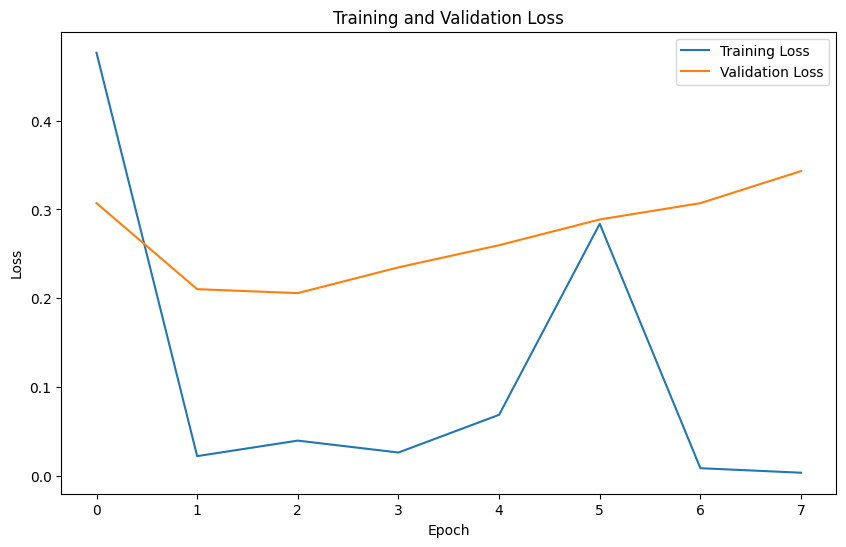

Accuracy: 0.9194
[('URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.', 'scam'), ("Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.", 'scam'), ('Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!', 'scam'), ('ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.', 'scam'), ("You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.", 'scam'), ('FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.', 'scam'), ('Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.', 'scam'), ('Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!', 'scam'), ('Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800

In [28]:
#model 4

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pickle

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Ensure only two columns: 'v1' (label) and 'v2' (message)
data = data[['v1', 'v2']]

# Step 1: Check for missing or empty values in 'v2'
data['v2'].fillna('', inplace=True)

# Step 2: Check for duplicate messages
data.drop_duplicates(subset=['v2'], inplace=True)

# Step 3: Check for messages classified as 'scam' containing scam-like keywords
scam_keywords = ['prize', 'gift', 'cash', 'click', 'link', 'win', 'free', 'congratulations', 'urgent', 'limited', 'offer', 'money', 'claim', 'act now', 'risk-free', 'exclusive', 'winner', 'immediate action', 'satisfaction guaranteed']
has_suspicious_content = data.apply(lambda row: any(keyword in row['v2'].lower() for keyword in scam_keywords) if row['v1'].lower() == 'scam' else True, axis=1)

# Filter out scam messages that don't pass the content check
data = data[has_suspicious_content]

# Preprocess label data (v1 -> 1 for scam, 0 for ham)
y = data['v1'].apply(lambda x: 1 if x.lower() == 'scam' else 0)

# Step 4: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], y, test_size=0.2, random_state=42)

# Step 5: Convert text to numerical values using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the RNN model
class SMSRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SMSRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)  # * 2 for bidirectional
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = torch.sigmoid(self.fc(out))
        return out

# Define model parameters
input_size = X_train_vectorized.shape[1]
hidden_size = 128
num_layers = 2
model = SMSRNN(input_size, hidden_size, num_layers)

# Set the criterion and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 5
best_loss = float('inf')
patience_counter = 0

# Train the model
epochs = 100  # Increased epochs for better training
losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # Add sequence dimension
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_inputs = X_test_tensor.unsqueeze(1)  # Add sequence dimension
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)

    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_sms_scam_detection_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    val_inputs = X_test_tensor.unsqueeze(1)  # Add sequence dimension
    outputs = model(val_inputs).squeeze()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy:.4f}')

# Save the vectorizer to Google Drive
vectorizer_save_path = '/content/drive/MyDrive/sms_tfidf_vectorizer.pkl'
with open(vectorizer_save_path, 'wb') as f:
    pickle.dump(vectorizer, f)

# Prediction functions
def preprocess_sms(message, vectorizer):
    message_vectorized = vectorizer.transform([message])
    message_tensor = torch.tensor(message_vectorized.toarray(), dtype=torch.float32).unsqueeze(1)
    return message_tensor

def predict_sms(model, message_tensor):
    model.eval()
    with torch.no_grad():
        output = model(message_tensor)
        prediction = (output > 0.5).float().item()
    return prediction

def interpret_prediction(prediction):
    return 'scam' if prediction == 1 else 'ham'

def check_messages(model, messages, vectorizer):
    results = []
    for message in messages:
        message_tensor = preprocess_sms(message, vectorizer)
        prediction = predict_sms(model, message_tensor)
        result = interpret_prediction(prediction)
        results.append((message, result))
    return results

# Example new messages for testing
new_messages = [
    "URGENT: Your {bank} account ending in {account_number} has been locked. Click here to verify your identity immediately.",
    "Congratulations! You've won a $1,000 gift card. To claim it, click the link and provide your information.",
    "Your {device} has a VIRUS! Call our support at 1-800-XXX-XXXX to fix it now!",
    "ALERT: Unusual login attempt detected on your {social_media} account. Click this link to secure your account.",
    "You've been randomly selected for an exclusive job opportunity! Reply with your email to get details.",
    "FINAL NOTICE: Your {utility} bill is overdue. Pay $50 now to avoid disconnection.",
    "Your package from {delivery_service} is on hold at customs. Pay $30 in fees to release it now.",
    "Limited time offer: Get 90% off on {product}. Click here to access the deal before it expires!",
    "Your credit card has been charged $200 for a purchase. Call this number to dispute: 1-800-XXX-XXXX.",
    "ACT NOW: You've been pre-approved for a $5,000 loan. Click here to secure the funds, no credit check required!",
    "Dear user, verify your account within 24 hours or it will be suspended. Click here to verify.",
    "Important: Your email account will be deactivated unless you confirm your password immediately.",
    "Congratulations! You've been selected for a cash prize of $5,000! Provide your bank details to claim it.",
    "Get your {product} for a limited time at 80% off! Click this link before it runs out!",
    "We've detected unusual activity on your {service} account. Verify your identity here to avoid being locked out.",
    "Last chance to claim your free gift card worth $100! Click here to claim it now!",
    "Warning! Your {bank} account has been compromised. Please log in to secure it immediately.",
    "You are eligible for a complimentary vacation! Respond to this email to find out more.",
    "Hey! Your friend {friend_name} sent you money through {payment_service}. Click here to claim it!",
    "Your {store} order has been canceled due to an issue. Resolve it here to prevent loss.",
    "You have been selected for a government grant of $10,000. Click here to apply now!",
    "Your {insurance} policy is set to expire soon! Click here to renew it instantly.",
    "An issue occurred with your recent payment. Update your payment information here immediately!",
    "Congrats! You’re the lucky winner of a free {product}! Click to claim it before it’s gone.",
    "Your subscription has been renewed automatically. Click here to get a refund for the last charge.",
    "You’ve received an urgent refund of $200. Please provide your bank details to process it.",
    "Hey there! We need to verify your account for your recent purchase. Click here now!",
    "Important security update: Verify your account to prevent it from being suspended.",
    "Your loan application has been approved! Click to get your funds now without a credit check.",
    "You’ve been randomly selected for a gift voucher! Click the link to claim yours quickly.",
    "Attention! Your {streaming_service} account is at risk of suspension. Reactivate it now to keep access.",
    "Important message: Your email has been flagged for suspicious activity. Click to confirm your identity.",
    "You've been selected for a survey! Complete it for a chance to win a $100 gift card.",
    "Dear customer, there’s an urgent message from {bank}. Log in now using this link: [link].",
    "You have an impending balance of $300. Verify your account immediately to prevent penalties.",
    "Hurry! Claim your exclusive VIP access to our premium site by clicking here.",
    "Important: Your email account is at risk due to suspicious activity. Confirm your identity here.",
    "Congratulations! You’re eligible for a free month of {service}. Click to claim it!",
    "URGENT: Your payment for {service} was not processed. Update your information to continue.",
    "You've been chosen for a complimentary trial of our premium service! Sign up now!",
    "Last day to redeem your $50 discount on your next purchase! Click here.",
    "Notification: A new device has logged into your account. Confirm it was you or secure your account.",
    "You qualify for government assistance! Click to find out how much you can receive today.",
    "Important: Your {subscription_service} account is about to expire! Renew now to avoid interruption.",
    "Alert: A refund of $150 is awaiting you. Click here to process it!",
    "You are a valued customer! Check out these exclusive offers just for you: [link].",
    "Your {wallet_service} account has unusual activity. Log in to confirm your identity.",
    "Great news! You’ve been chosen to receive half off your next purchase at {store}! Click to redeem.",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You've won a free ticket to {event_name}. Click here for details.",
    "Act fast: You have a $100 gift card waiting for you! Claim it now before it expires.",
    "I just finished my project! Can’t wait to share it with you this weekend.",
    "Hi! Just wanted to check if you’re available for dinner tonight. Let me know!",
    "Don't forget to pick up groceries after work! List includes milk, bread, and eggs.",
    "Your package from Amazon has been delivered! Check it at your doorstep now.",
    "Hi! Just wanted to share this recipe with you; I think you’ll love it!",
    "Safety alert! Your fitness tracker shows unusual activity. Log in to check your health stats.",
    "Friendly reminder: Your doctor’s appointment is next Thursday at 3 PM.",
    "Your registration for the cooking class is confirmed! Looking forward to seeing you there.",
    "You’ve been selected for a cash prize of $1,000! Provide your information to claim it now!",
    "Your account has suspicious activity. Click here to verify your account immediately!",
    "Congratulations! You are the winner of a free vacation for two! Respond to claim it.",
    "ALERT: Your Netflix account has been suspended. Click to verify your payment info.",
    "You have a pending payment of $300. Please confirm your payment method immediately.",
    "Your {food_delivery} order has arrived! Enjoy your meal!",
    "You've been invited to join an exclusive club! Click here to sign up for free.",
    "Important update: Your LinkedIn profile was viewed by someone. Click to review.",
    "Your account has been locked due to suspicious activity. Click this link to unlock it now.",
    "Congratulations! You've won a free vacation! Click here for details on how to claim it.",
    "Act fast: Limited spots available for our webinar tomorrow! Register now!",
    "You have 1 new friend request from someone you may know! Click to see their profile.",
    "Your subscription will auto-renew on {date}. Update your payment info to avoid issues.",
    "I found a great deal on travel insurance. Want me to send you the link?",
    "Important: Your {bank} account is about to be suspended! Click here to verify your identity.",
    "You're invited to participate in our exclusive promo! Click to join now.",
    "You qualify for an all-expenses-paid trip! Click here to find out more.",
    "ALERT: Multiple failed login attempts on your account. Please reset your password immediately.",
    "Congratulations! You've been chosen for an exclusive trial of our premium service! Sign up now!",
    "Important: Update your payment info to prevent service interruption.",
    "You've been selected for a market research survey! Earn rewards by participating."
     "Hi! Just wanted to let you know that I'll be late for dinner tonight. See you around 7!",
    "Don't forget about our meeting tomorrow at 10 AM. Let me know if you need any materials prepared.",
    "I found that book you were looking for at the library. I'll bring it when I come over this weekend.",
    "Just checking in to see how you're doing. It's been a while since we last caught up!",
    "Your reminder for the dentist appointment is set for next Thursday at 3 PM.",
    "Hey, I sent you an email with the details for the trip. Let me know what you think!",
    "Thank you for your payment! Your order is being processed and will be shipped soon.",
    "Happy Birthday! Hope you have a fantastic day filled with cake and fun!",
    "Your subscription to the monthly newsletter is confirmed. Enjoy the upcoming articles!",
    "Just a friendly reminder that your car service is scheduled for this Friday at 2 PM.",
    "Loved the movie we watched last night! Let's do that again soon.",
    "Can you pick up some groceries on your way home? I need milk and eggs.",
    "Your favorite restaurant has a special promotion this weekend. We should check it out!",
    "Just got back from my trip! Can't wait to share the photos with you.",
    "Thanks for helping me with the project last week. I really appreciate it!",
    "Your package has been delivered! It's waiting at the front door.",
    "Let’s have a coffee catch-up next week! When are you free?",
    "I was thinking about going for a hike this weekend. Would you like to join?",
    "Just wanted to share this article I found interesting. I think you’d like it too!",
    "Your appointment with Dr. Smith is confirmed for next Wednesday at 11 AM.",
    "Great job on the presentation! You were really impressive.",
    "I've made plans for the weekend. Let me know if you want to join!",
    "Your support ticket has been resolved. Thank you for your patience!",
    "I've attached the document you requested. Let me know if you need anything else.",
    "Looking forward to our game night on Friday! Bring your favorite snacks.",
    "I tried that recipe you suggested, and it turned out delicious! Thank you!",
    "The book club will meet next Thursday at my place. Hope you can make it!",
    "I completed the report and will send it out for review by the end of the day.",
    "Your feedback on the draft would be greatly appreciated. Let me know what you think!",
    "Plans for this month’s family gathering are in the works. More details soon!",
    "I'm thinking of starting a new series to watch. Any recommendations?",
    "I just finished my project! Can't wait to show you what I've been working on.",
    "Could you send me your address again? I want to send you something special.",
    "I received your gift in the mail today! Thank you so much, it was very thoughtful.",
    "Let's set up a time to discuss our upcoming event. When are you available?",
    "I’m planning a little barbecue at my place this Saturday. Hope you can join!",
    "Did you hear back about the job? I'm rooting for you!",
    "Just a little check-in! How’s everything going on your end?",
    "The concert tickets arrived! Can't wait for the show next month.",
    "I'm interested in taking that yoga class with you. Sign me up!",
    "Just finished my workout. How is your fitness routine going?",
    "Excited for the vacation next month! We need to finalize the itinerary.",
    "Thanks for sharing that playlist! I've been listening to it all week.",
    "Can we reschedule our meeting to next Wednesday? Something came up.",
    "I just wanted to say how much I enjoy our chats. They always brighten my day!",
    "Don't forget to bring your laptop for the workshop next week.",
    "The movie night was a blast! We should do that again soon.",
    "Your feedback was valuable in the last meeting. Thanks for speaking up!",
    "Let's plan a trip to the beach before summer is over!",
    "I found a great deal on flights. Want me to send you the details?",
    "I think your suggestion for the project is spot on! Let's implement it.",
    "Looking forward to the family reunion next month! It'll be great to see everyone.",
    "Hi! Just remembered to send you that article we talked about last time.",
    "Remember to take your umbrella today. It might rain later.",
    "Can you believe it’s been so long since we last met? Let’s schedule something soon.",
    "I’ve been thinking about getting a pet. Any advice?",
    "We should catch up over coffee soon! What does your schedule look like?",
    "I finally watched that movie you recommended. It was fantastic!",
    "Your presence is missed at our weekly meetings. Hope you can make it next time!",
    "Thank you for your help with the fundraiser. We raised more than expected!",
    "Just a friendly reminder for our meeting this Friday at 3 PM.",
    "Your feedback on this week's team project would be greatly appreciated.",
    "I hope your week is going well! Looking forward to catching up soon.",
    "We’re having a potluck next weekend! Bring your favorite dish!",
    "I just finished reading a great book and I think you'll love it too!",
    "Let’s make plans to go hiking next weekend. The weather should be perfect!",
    "I'm trying out a new restaurant this week. Would you like to join?",
    "Your recent purchase has shipped! Track it here: {tracking_link}."
]
results = check_messages(model, new_messages, vectorizer)
print(results)

Epoch [1/50], Loss: 0.4290, Val Loss: 0.4125
Epoch [2/50], Loss: 0.3411, Val Loss: 0.3716
Epoch [3/50], Loss: 0.2479, Val Loss: 0.3832
Epoch [4/50], Loss: 0.3465, Val Loss: 0.4096
Epoch [5/50], Loss: 0.2405, Val Loss: 0.4432
Epoch [6/50], Loss: 0.2023, Val Loss: 0.4726
Epoch [7/50], Loss: 0.0354, Val Loss: 0.5046
Early stopping triggered


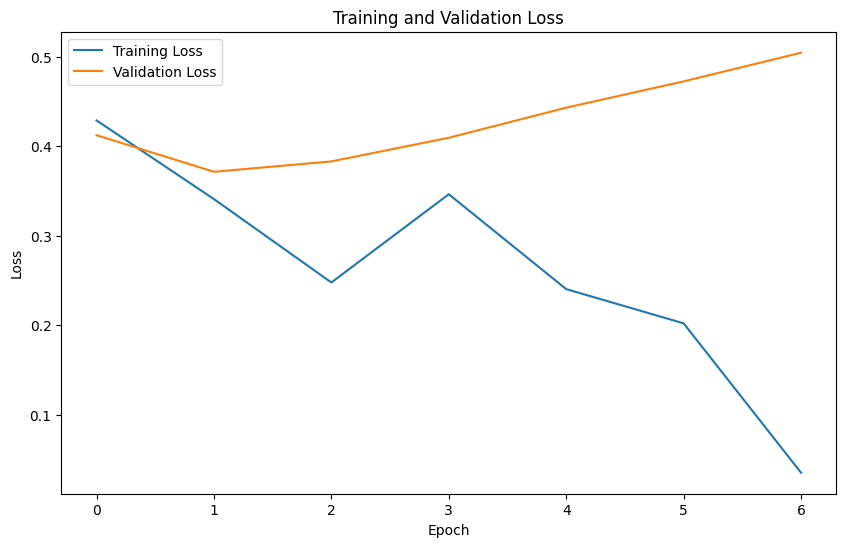

Accuracy: 0.8261
[('URGENT: Your account has been suspended. Click here to reactivate: http://bit.ly/2kLm9Xw', 'ham'), ('Hi Mom, can you pick me up after school today? Thanks!', 'scam')]


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pickle

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/scam4.csv', encoding='utf-8')

# Ensure only two columns: 'v1' (label) and 'v2' (message)
data = data[['v1', 'v2']]

# Preprocess label data (v1 -> 1 for scam, 0 for ham)
y = data['v1'].apply(lambda x: 1 if x.lower() == 'scam' else 0)

# Step 4: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], y, test_size=0.2, random_state=42)

# Step 5: Convert text to numerical values using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Handle missing values in X_train and X_test
X_train = X_train.fillna('')  # Replace NaN values with empty strings in X_train
X_test = X_test.fillna('')   # Replace NaN values with empty strings in X_test

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the RNN model
class SMSRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SMSRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)  # * 2 for bidirectional
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = torch.sigmoid(self.fc(out))
        return out

# Define model parameters
input_size = X_train_vectorized.shape[1]
hidden_size = 128
num_layers = 2
model = SMSRNN(input_size, hidden_size, num_layers)

# Set the criterion and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 5
best_loss = float('inf')
patience_counter = 0

# Train the model
epochs = 50
losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # Add sequence dimension
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_inputs = X_test_tensor.unsqueeze(1)
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)

    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_sms_scam_detection_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    val_inputs = X_test_tensor.unsqueeze(1)
    outputs = model(val_inputs).squeeze()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy:.4f}')

# Save the vectorizer to Google Drive
vectorizer_save_path = '/content/drive/MyDrive/sms_tfidf_vectorizer.pkl'
with open(vectorizer_save_path, 'wb') as f:
    pickle.dump(vectorizer, f)

# Prediction functions
def preprocess_sms(message, vectorizer):
    message_vectorized = vectorizer.transform([message])
    message_tensor = torch.tensor(message_vectorized.toarray(), dtype=torch.float32).unsqueeze(1)
    return message_tensor

def predict_sms(model, message_tensor):
    model.eval()
    with torch.no_grad():
        output = model(message_tensor)
        prediction = (output > 0.5).float().item()
    return prediction

def interpret_prediction(prediction):
    return 'scam' if prediction == 1 else 'ham'

def check_messages(model, messages, vectorizer):
    results = []
    for message in messages:
        message_tensor = preprocess_sms(message, vectorizer)
        prediction = predict_sms(model, message_tensor)
        result = interpret_prediction(prediction)
        results.append((message, result))
    return results

# Example new messages for testing
new_messages = [
    "URGENT: Your account has been suspended. Click here to reactivate: http://bit.ly/2kLm9Xw",
    "Hi Mom, can you pick me up after school today? Thanks!"
]
results = check_messages(model, new_messages, vectorizer)
print(results)
